# 1. 문제정의

누구나 S&P500 지수가 한국뿐만 아니라 전 세계의 주가에 영향을 끼친다는 것을 알고있다.\
하지만 우리는 얼마나 영향을 끼치는지 정확히 알고 싶어서 약 16년치의 주식정보를 가지고 분석을 해보았다.

# 2. 데이터 수집

데이터는 총 3개를 사용하였는데,\
S&P 500 , KOSPI , KOSDAK 이렇게 사용하였다.\
이들의 종목에서 종가, 전일비, 거래량을 뽑아서 데이터를 수집하였다

코스피와 코스닥은 네이버에서 수집하였고 S&P 500은 다음에서 수집하였다.


# 3. 데이터 전처리

한국시장과 미국시장의 규모는 너무나도 차이나기 때문에 데이터를 전처리해줄 필요가 있었다.\
따라서 우리는 전일비가 핵심 데이터므로 전일비를 해당 시장의 종가로 나누어서 처리를 해주었다.\
예를들면 한국시장에서 전일비가 1.3이 움직인것과 미국시장에서 전일비가 1.3이 움직인것은 차이가 크기때문에\
이 전일비의 비율을 맞추고자 해당 시장의 종가로 나누어 준것이다.

# 4. 예상되는 결과

사실 우리도 너무나도 당연하게 S&P 500이 완벽하게는 아니여도 강력하게 한국 시장에 영향을 끼친다고 예상하였다.

# 5. 결과

아래는 우리가 데이터를 분석하여 시각화 시킨것이다.

### 5-1  각 시장의 주식표

여기서 차트는 오른쪽에서 왼쪽이 최근이다.
시간이 없어서 이를 수정하지 못하였다...

아무튼 차트들을 비교해보면 일단 똑같이 상향그래프를 보여주고 있으며\
당연하게도 코스피와 코스닥은 거의 비슷하게 움직이는 것을 확인할 수 있다.\
하지만 S&P 500 과는 그렇게 많이 비슷하지 않다는 것을 알 수 있다. 

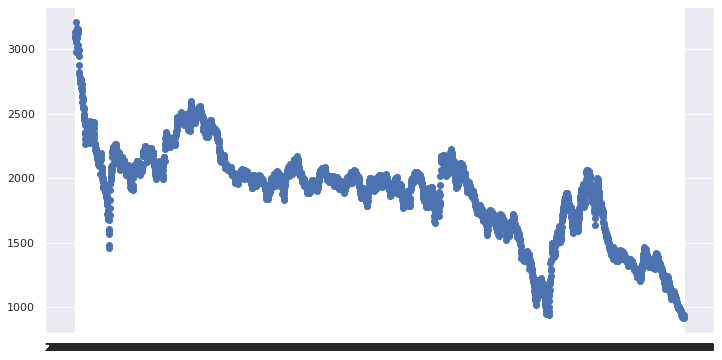

In [165]:
# 코스피 차트
plt.figure(figsize=(12, 6))
plt.scatter(df3['date'][0:3900], df3['price'][0:3900])
plt.show()

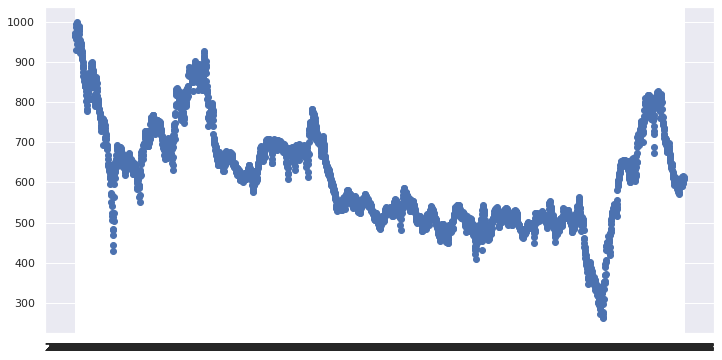

In [161]:
#코스닥 차트
plt.figure(figsize=(12, 6))
plt.scatter(df['date'][0:3500], df['price'][0:3500])
plt.show()

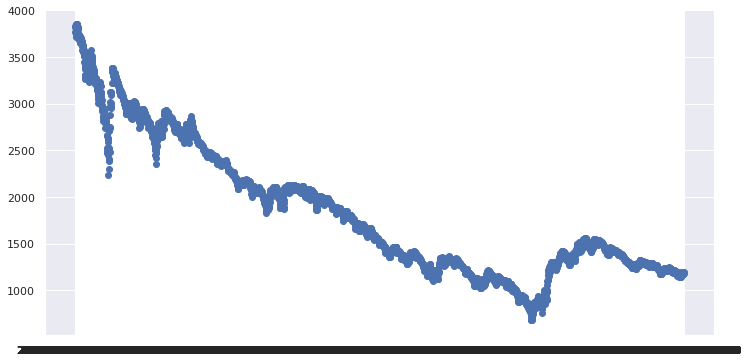

In [162]:
# S&P 500 차트
plt.figure(figsize=(12, 6))
plt.scatter(df2['date'][0:4000], df2['price'][0:4000])
plt.show()

### 5-2  각 시장의 전일비에 따른 스캐터 그래프

이제 우리의 핵심인 전일비를 비교해 보았다.\
스캐터 그래프로 찍었으며 모두 우상향을 나타내는 것을 확인할 수 있다\
이는 양적상관관계로써 의미가 있다는 것을 알 수 있다.


### 5-2-1  코스닥과 S&P 500 전일비 그래프

어느정도 우상향을 보여주지만 완벽하게 관계가 있다고 보기에는 어렵다.\
따라서 그래프로만은 확인할 수 없어서 우리는 피어슨 상관계수를 이용하여 값을 나타내어 보았다.\
그 결과 코스닥과 S&P500의 상관계수가 0.1944로 나타났다. 따라서 우리는 서로 약한 양의 상관관계가 있다는것을 알 수 있었다.\
하지만 아무리 코스닥이라해도 뚜렷한 정도를 기대했던 우리에게 결과가 너무 낮아서 16년치를 한번에 비교하는 것이 아닌\
5년치씩 비교를 해보았다. 이번에 기대되는 결과는 최근 5년으로 올 수 록 관계가 강해질 것이라는 기대를 하였다.


> 참고로 코스피와 코스닥의 상관계수는 0.7 ~ 0.9로 정말 강한 양의 선형관계를 보여준다.


일반적인 피어슨 상관계수 해석법)

0.1 < r < 0.3 : 약한 양의 상관관계\
0.3 < r < 0.7 : 뚜렷한 양의 선형관계\
0.7 < r < 1 : 강한 양의 선형관계

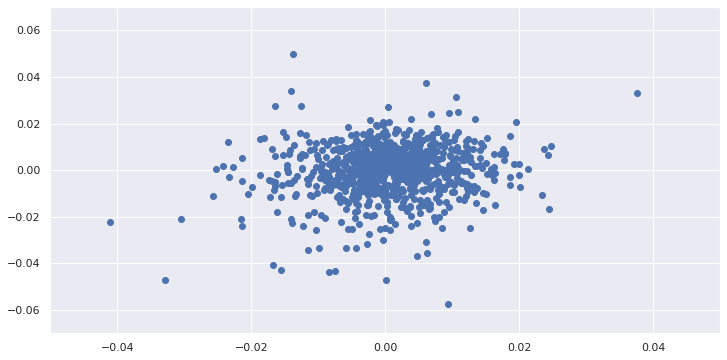

In [194]:
# 코스닥 S&P 500 델타에따른 스캐터그래프
plt.figure(figsize=(12, 6))
plt.scatter(nasdak_delta_list,kosdak_delta_list)
plt.ylim(-0.07,0.07)
plt.xlim(-0.05,0.05)
plt.show()

In [168]:
#16년치 코스닥 S&P500 피어슨 상관계수
from scipy import stats

kosdak_delta_list = np.array(kosdak_delta_list)
nasdak_delta_list = np.array(nasdak_delta_list)

stats.pearsonr(kosdak_delta_list,nasdak_delta_list)

(0.1944185587139805, 4.265094963778547e-34)

### 코스닥 S&P 500 2021 - 2016 5년치 코스닥 S&P500 스캐터그래프

역시 우리의 예상대로 최근 5년에는 좀 더 강한 상관관계를 보여주었다.\
하지만 사실 이정도도 우리가 기대한 만큼은 아니지만 이정도의 결과도 유의미하다고 생각한다.

그래프도 확인해보면 최근 5년치가 좀 더 확실하게 우상향을 보여준다.


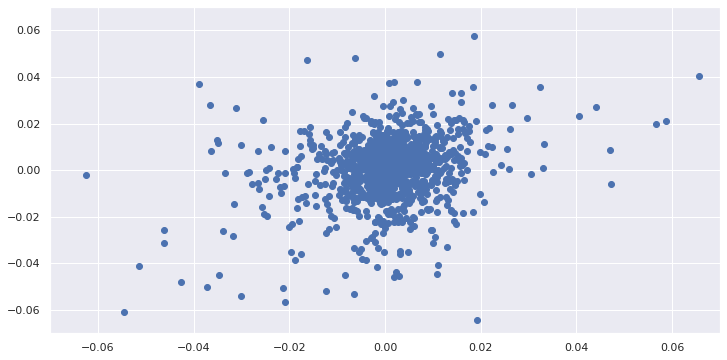

In [184]:
# 코스닥 S&P 500 2021 - 2016 5년치 코스닥 S&P500 스캐터그래프
plt.figure(figsize=(12, 6))
plt.scatter(nasdak_delta_list,kosdak_delta_list)
plt.ylim(-0.07,0.07)
plt.xlim(-0.07,0.07)
plt.show()

In [170]:
#2021 - 2016 5년치 코스닥 S&P500 피어슨 상관계수
from scipy import stats

kosdak_delta_list = np.array(kosdak_delta_list)
nasdak_delta_list = np.array(nasdak_delta_list)

stats.pearsonr(kosdak_delta_list,nasdak_delta_list)

(0.2559061970502801, 1.5171583763347594e-19)

### 코스닥 S&P 500 2016 - 2011 5년치 코스닥 S&P500 스캐터그래프

그런데 그 뒤의 5년치는 정말 거의 관계가 없는 것으로 나왔다.\
아마 시대적인 이유도 있을 것이고 사실 코스닥은 S&P 500의 영향보다는 국내 이슈같은 것이 훨씬\
더 큰 영향을 끼쳐서 그런것 같다.

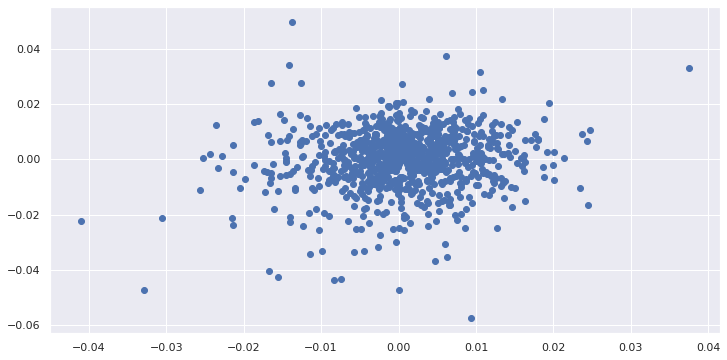

In [187]:
# 코스닥 S&P 500 2016 - 2011 5년치 코스닥 S&P500 스캐터그래프
plt.figure(figsize=(12, 6))
plt.scatter(nasdak_delta_list,kosdak_delta_list)
# plt.ylim(-0.07,0.07)
# plt.xlim(-0.07,0.07)
plt.show()

In [172]:
#2016- 2011 5년치 코스닥 S&P500 피어슨 상관계수
from scipy import stats

kosdak_delta_list = np.array(kosdak_delta_list)
nasdak_delta_list = np.array(nasdak_delta_list)

stats.pearsonr(kosdak_delta_list,nasdak_delta_list)

(0.13301019561317132, 3.629795189308236e-05)

### 코스닥 S&P 500 2010 - 2006 5년치 코스닥 S&P500 스캐터그래프

그 전 5년치 역시 그렇게 큰 상관관계를 보이지 않는다.\
이를 통해 코스닥과 S&P 500은 그렇게 크게 유의미한 관계를 보이지 않지만, 최근 5년은\
유의미한 관계를 보여준다고 생각한다.

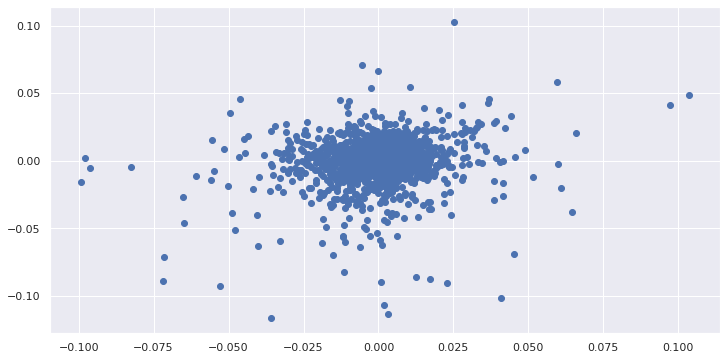

In [197]:
# 코스닥 S&P 500 2010 - 2006 5년치 코스닥 S&P500 스캐터그래프
plt.figure(figsize=(12, 6))
plt.scatter(nasdak_delta_list,kosdak_delta_list)
# plt.ylim(-0.07,0.07)
# plt.xlim(-0.07,0.07)
plt.show()

In [203]:
#2010- 2006 5년치 코스닥 S&P500 피어슨 상관계수
from scipy import stats

kosdak_delta_list = np.array(kosdak_delta_list)
nasdak_delta_list = np.array(nasdak_delta_list)

stats.pearsonr(kosdak_delta_list,nasdak_delta_list)

(0.17359852538386156, 7.801972863510888e-13)

### 코스닥 S&P 500 큰 이슈에서의 그래프

이는 우리가 이번에 코로나 이슈때 기간을 좁혀 비교해본 데이터이다.\
역시나 관계가 더 강해지긴 했으나 그렇게 크게 강한관계가 아닌것을 확인할 수 있다

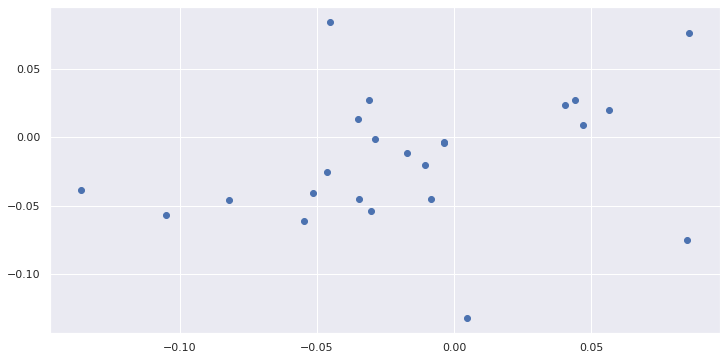

In [214]:
# 코스닥 S&P 500 델타에따른 스캐터그래프
plt.figure(figsize=(12, 6))
plt.scatter(nasdak_delta_list,kosdak_delta_list)
# plt.ylim(-0.07,0.07)
# plt.xlim(-0.07,0.07)
plt.show()

In [213]:
#코로나 대폭락 코스닥 S&P500 피어슨 상관계수
from scipy import stats

kosdak_delta_list = np.array(kosdak_delta_list)
nasdak_delta_list = np.array(nasdak_delta_list)

stats.pearsonr(kosdak_delta_list,nasdak_delta_list)

(0.29488641168202073, 0.1618558997335033)

In [112]:
# pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matlab 사용자의 시각화 도구 사용가능
# 분석에 사용가능한 여러가지 시각화 함수를 제공합니다. 보통 plt라는 예명으로 사용합니다.
%matplotlib inline # 주피터 노트북에 최적화 된 그래프 설정(코랩 사용불가)
# %matplotlib notebook # 인터렉티브 그래프 가능(코랩 사용불가)

UsageError: unrecognized arguments: # 주피터 노트북에 최적화 된 그래프 설정(코랩 사용불가)


In [113]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [111]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import platform
%matplotlib inline
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'NanumBarunGothic'
    rc('font', family='NanumBarunGothic')
elif platform.system() == 'Windows':
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = fm.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")